In [9]:
from scipy.io import wavfile

(source_clean_fs, source_clean_data) = wavfile.read('./data/source_clean.wav')
(plini_clean_fs, plini_clean_data) = wavfile.read('./data/plini_clean.wav')

In [10]:
import pandas as pd

In [13]:
source_clean_df = pd.DataFrame(source_clean_data, columns=['L', 'R'])
source_clean_df.head()

,L,R
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [14]:
plini_clean_df = pd.DataFrame(plini_clean_data, columns=['L', 'R'])
plini_clean_df.head()

,L,R
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [23]:
plini_clean_df['L'].max()

32767

In [22]:
2 ** 15

32768

In [280]:
MAX_VALUE = 2 ** 15 - 1
MAX_VALUE

32767

In [27]:
len(plini_clean_df), len(source_clean_df)

(2442240, 2442240)

In [30]:
START_END = int(len(plini_clean_df) * 0.8)
START_END

1953792

In [32]:
(X_train_start, X_train_end) = (0, START_END)
(X_test_start, X_test_end) = (START_END + 1, len(source_clean_df))

In [33]:
(y_train_start, y_train_end) = (0, START_END)
(y_test_start, y_test_end) = (START_END + 1, len(source_clean_df))

## IT'S MONO

In [45]:
X_train_raw = source_clean_df['L'][X_train_start:X_train_end]
X_train_raw.head()

0    0
1    0
2    0
3    0
4    0
Name: L, dtype: int16

In [46]:
X_test_raw = source_clean_df['L'][X_test_start:X_test_end]
X_test_raw.head()

1953793   -560
1953794   -485
1953795   -395
1953796   -302
1953797   -215
Name: L, dtype: int16

In [47]:
y_train_raw = plini_clean_df['L'][y_train_start:y_train_end]
y_train_raw.head()

0    0
1    0
2    0
3    0
4    0
Name: L, dtype: int16

In [48]:
y_test_raw = plini_clean_df['L'][y_test_start:y_test_end]
y_test_raw.head()

1953793    807
1953794    559
1953795    206
1953796    178
1953797    213
Name: L, dtype: int16

In [134]:
X_N_DEV = source_clean_fs
X_OFFSET_DEV = source_clean_fs * 2

y_N_DEV = int(source_clean_fs / 8)
y_OFFSET_DEV = source_clean_fs * 2

In [135]:
y_N_DEV

5512

In [136]:
N_WINDOW_POINTS = int(source_clean_fs * 0.02)
N_WINDOW_POINTS

882

In [137]:
def make_windows(df, n_window_points):
    df_index = df.index
    index = 0
    windows = []

    for index in range(0, len(df) - n_window_points):
        windows.append(df_index[index:(index + n_window_points)])

    return windows

In [138]:
X_train_wnd = make_windows(X_train_raw[X_OFFSET_DEV:X_OFFSET_DEV+X_N_DEV], N_WINDOW_POINTS)
len(X_train_wnd)

43218

In [139]:
X_test_wnd = make_windows(X_test_raw[X_OFFSET_DEV:X_OFFSET_DEV+X_N_DEV], N_WINDOW_POINTS)
len(X_test_wnd)

43218

In [140]:
y_train_wnd = make_windows(y_train_raw[y_OFFSET_DEV:y_OFFSET_DEV+y_N_DEV], N_WINDOW_POINTS)
len(y_train_wnd)

4630

In [141]:
y_test_wnd = make_windows(y_test_raw[y_OFFSET_DEV:y_OFFSET_DEV+y_N_DEV], N_WINDOW_POINTS)
len(y_test_wnd)

4630

In [142]:
X_test_wnd[0]

RangeIndex(start=2041993, stop=2042875, step=1)

In [143]:
X_test_raw[X_test_wnd[0]]

2041993     147
2041994     154
2041995     176
2041996     215
2041997     279
2041998     358
2041999     443
2042000     539
2042001     625
2042002     696
2042003     755
2042004     791
2042005     801
2042006     790
2042007     755
2042008     691
2042009     598
2042010     478
2042011     333
2042012     169
2042013      -6
2042014    -183
2042015    -360
2042016    -528
2042017    -681
2042018    -813
2042019    -926
2042020   -1016
2042021   -1084
2042022   -1128
           ... 
2042845     -43
2042846       9
2042847      66
2042848     122
2042849     177
2042850     234
2042851     288
2042852     337
2042853     379
2042854     419
2042855     453
2042856     483
2042857     514
2042858     546
2042859     571
2042860     586
2042861     591
2042862     583
2042863     564
2042864     541
2042865     515
2042866     494
2042867     471
2042868     450
2042869     430
2042870     407
2042871     386
2042872     363
2042873     348
2042874     340
Name: L, Length: 882, dt

## Preparing data for processing

In [144]:
X_train = list(map(lambda wnd: X_train_raw[wnd], X_train_wnd))
X_train[0], X_train[1]

(88200    -725
 88201    -877
 88202    -986
 88203   -1013
 88204    -959
 88205    -815
 88206    -628
 88207    -424
 88208    -218
 88209     -28
 88210     151
 88211     303
 88212     431
 88213     534
 88214     615
 88215     671
 88216     707
 88217     751
 88218     842
 88219     990
 88220    1158
 88221    1316
 88222    1448
 88223    1559
 88224    1660
 88225    1754
 88226    1793
 88227    1738
 88228    1584
 88229    1357
          ... 
 89052       1
 89053     124
 89054     221
 89055     343
 89056     416
 89057     540
 89058     613
 89059     661
 89060     665
 89061     681
 89062     753
 89063     820
 89064     846
 89065     844
 89066     787
 89067     605
 89068     431
 89069     282
 89070     166
 89071      27
 89072     -61
 89073    -111
 89074    -235
 89075    -396
 89076    -587
 89077    -831
 89078   -1113
 89079   -1381
 89080   -1592
 89081   -1689
 Name: L, Length: 882, dtype: int16, 88201    -877
 88202    -986
 88203   -1013
 882

In [145]:
X_test = list(map(lambda wnd: X_test_raw[wnd], X_test_wnd))
X_test[0], X_test[1]

(2041993     147
 2041994     154
 2041995     176
 2041996     215
 2041997     279
 2041998     358
 2041999     443
 2042000     539
 2042001     625
 2042002     696
 2042003     755
 2042004     791
 2042005     801
 2042006     790
 2042007     755
 2042008     691
 2042009     598
 2042010     478
 2042011     333
 2042012     169
 2042013      -6
 2042014    -183
 2042015    -360
 2042016    -528
 2042017    -681
 2042018    -813
 2042019    -926
 2042020   -1016
 2042021   -1084
 2042022   -1128
            ... 
 2042845     -43
 2042846       9
 2042847      66
 2042848     122
 2042849     177
 2042850     234
 2042851     288
 2042852     337
 2042853     379
 2042854     419
 2042855     453
 2042856     483
 2042857     514
 2042858     546
 2042859     571
 2042860     586
 2042861     591
 2042862     583
 2042863     564
 2042864     541
 2042865     515
 2042866     494
 2042867     471
 2042868     450
 2042869     430
 2042870     407
 2042871     386
 2042872     3

In [148]:
y_train = list(map(lambda wnd: y_train_raw[wnd], y_train_wnd))
y_train[0], y_train[1]

(88200    1118
 88201     258
 88202     145
 88203     854
 88204     896
 88205     -54
 88206   -1922
 88207   -3178
 88208   -1751
 88209    1715
 88210    4552
 88211    4313
 88212    2005
 88213    -137
 88214   -1049
 88215     866
 88216    3828
 88217    4486
 88218    2774
 88219      42
 88220   -1738
 88221   -1592
 88222     -35
 88223    1778
 88224    2595
 88225    1983
 88226    1740
 88227    1965
 88228    1299
 88229    1925
          ... 
 89052   -1176
 89053   -1907
 89054   -1610
 89055   -2147
 89056   -1488
 89057    1142
 89058    1252
 89059    1798
 89060     482
 89061     101
 89062   -3090
 89063   -5149
 89064   -3446
 89065   -1327
 89066    -249
 89067   -1297
 89068    2541
 89069    2939
 89070   -2563
 89071   -6492
 89072   -6727
 89073   -4716
 89074   -2427
 89075     193
 89076    2419
 89077     875
 89078   -2570
 89079   -3712
 89080   -4386
 89081   -2282
 Name: L, Length: 882, dtype: int16, 88201     258
 88202     145
 88203     854
 882

In [149]:
y_test = list(map(lambda wnd: y_test_raw[wnd], y_test_wnd))
y_test[0], y_test[1]

(2041993     314
 2041994    -408
 2041995    -288
 2041996    -101
 2041997    -390
 2041998   -1198
 2041999   -2009
 2042000   -2520
 2042001   -2666
 2042002   -2592
 2042003   -2741
 2042004   -2906
 2042005   -2911
 2042006   -2718
 2042007   -2175
 2042008   -1581
 2042009   -1250
 2042010   -1388
 2042011   -1692
 2042012   -1780
 2042013   -1656
 2042014   -1289
 2042015    -987
 2042016    -755
 2042017    -609
 2042018    -437
 2042019    -199
 2042020     -61
 2042021      19
 2042022    -117
            ... 
 2042845   -1999
 2042846   -1313
 2042847    -389
 2042848     -23
 2042849    -297
 2042850   -1237
 2042851   -2557
 2042852   -3439
 2042853   -3249
 2042854   -2001
 2042855    -772
 2042856    -207
 2042857    -588
 2042858   -1407
 2042859   -2062
 2042860   -2361
 2042861   -2099
 2042862   -1604
 2042863   -1453
 2042864   -1193
 2042865    -387
 2042866      -2
 2042867    -124
 2042868    -307
 2042869    -763
 2042870   -1302
 2042871   -1592
 2042872   -12

In [335]:
def normalize_keeping_mean(arr, forced_abs=None):
    left_abs = np.abs(arr.mean() - arr.min())
    right_abs = np.abs(arr.max() - arr.mean())
    
    n = max(left_abs, right_abs)
    
    if (forced_abs is not None):
        n = forced_abs
    
    return np.clip(arr / n, -1.0, 1.0)

In [343]:
X_tr = np.array(list(map(lambda x: np.array(x), X_train)))
X_tr_n = normalize_keeping_mean(X_tr, forced_abs=MAX_VALUE)
X_tr_n.min(), X_tr_n.max(), np.mean(X_tr_n)

(-0.07431257057405316, 0.09094515823847163, 2.026278089936955e-06)

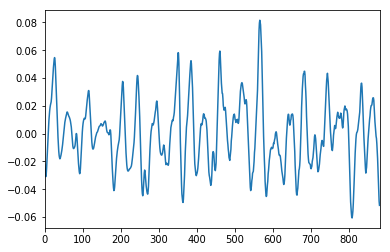

In [345]:
pd.Series(X_tr_n[0]).plot.line()

In [348]:
X_te = np.array(list(map(lambda x: np.array(x), X_test)))
X_te_n = normalize_keeping_mean(X_te, forced_abs=MAX_VALUE)
X_te_n.min(), X_te_n.max(), np.mean(X_te_n)

(-0.06585894344920194, 0.13354899746696372, 2.4376905272377355e-06)

In [349]:
y_tr = np.array(list(map(lambda x: np.array(x), y_train)))
y_tr_n = normalize_keeping_mean(y_tr, forced_abs=MAX_VALUE)
y_tr_n.min(), y_tr_n.max(), np.mean(y_tr_n)

(-0.401989806817835, 0.380596331675161, -0.00013942314010930278)

In [350]:
y_te = np.array(list(map(lambda x: np.array(x), y_test)))
y_te_n = normalize_keeping_mean(y_te, forced_abs=MAX_VALUE)
y_te_n.min(), y_te_n.max(), np.mean(y_te_n)

(-0.16470839564195686, 0.1424604022339549, -3.383165768275146e-05)

## Finished data processing!

In [155]:
import numpy as np

In [157]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils